<a href="https://colab.research.google.com/github/salarbalou/Data_Analysis_Projects/blob/main/Solving_Fredholm_Integral_of_a_second_kind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.interpolate as sci
import matplotlib.pyplot as plt
import scipy.linalg as sla

def FIE2_Nystrom (k, f, l, a, b): # function is the fredholm integral of the second kind solver using Nystrom Trapezodial method
 n = 1000 
 h, xl, yl, xnew = (b-a)/(n-1) , np.linspace(a, b, n) , np.linspace(a, b, n), np.linspace(a, b, 1100) # h is the increment, xl,and  yl are two arrays of desired length, xnew is an array of size 1e6 
 fi = np.array([f(x) for x in xl]); kij = np.reshape(np.array([k(x, y) for x in xl for y in yl]), ((n, n))) # fi is a size n array holdig values of fucntion f, kij is a matrix of n*n with values of fun k
 K = np.zeros((n, n)); K = - l * (h) * kij # K is another matrix that all its indices are initially eqaul to (- l * (h) * kij)
 for i in range(n):
   K[i, i] = 1 - l * (h/2) * kij[i, i] # we update the diagonal of matrix K 
 K[1:, 0] = - l * (h/2) * kij[1:, 0] ; K[0:-1, -1] = - l * (h/2) * kij[0:-1:, -1] # first and last column of matrix K are updated accordingly
 sol = sla.solve(l * K, fi) # we solve for the matrix K and array fi, sol si the numerical solution to the problem
 I = sci.interp1d(xl, sol, kind = 'cubic') # we interepolate the sol with respect to x to find the function
 If = lambda x: np.array([I(x)]) # This is the function 
 er = np.abs(np.average(sol) - np.average(If(xnew))) # we measure the error between solution and the interpolated function using million values (xnew)
 plt.plot(xl, sol, '-', label = 'Solution') # we plot the results
 plt.plot(xnew, If(xnew)[0], '--', label = 'Interpolation')
 plt.rcParams["figure.figsize"] = (10, 8)
 plt.legend(fontsize = 20)
 plt.xlabel('x', size = 20); plt.ylabel('ψ(x)', size = 20); plt.xticks(fontsize = 16); plt.yticks(fontsize = 16), plt.locator_params(axis='x', nbins=20)
 plt.title(f'Error =  {er}', fontsize = 20)
 return(plt.plot(xl, sol, '-', xnew, If(xnew)[0], '--'))

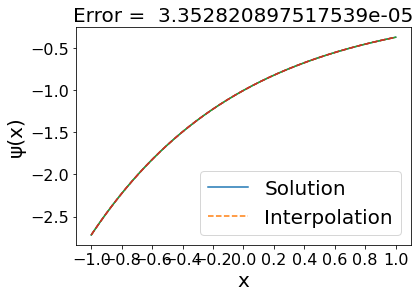

In [ ]:
#Problem 1
a1, b1 = -1, 1
l1 = -1
f1 = lambda x: np.exp(x)
k1 = lambda x, y: x * np.exp(y*(1-x))
FIE2_Nystrom(k1, f1, l1, a1, b1)

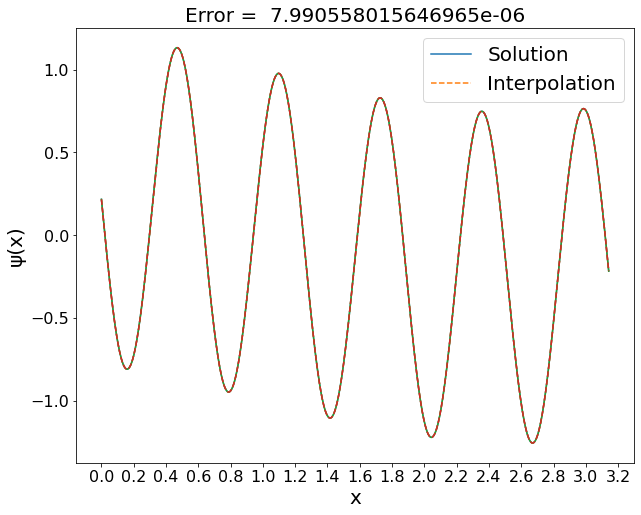

In [ ]:
#Problem 2
a2, b2 = 0, np.pi
l2 = -1
f2 = lambda x: np.sin(10* x)
k2 = lambda x, y: np.sin(x+y)
FIE2_Nystrom(k2, f2, l2, a2, b2)

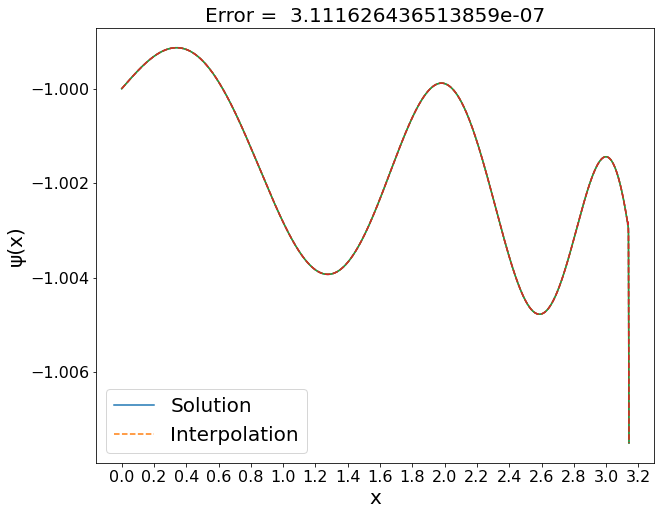

In [ ]:
#Problem 3
a3, b3 = 0, np.pi
l3 = -1
f3 = lambda x: 1+ np.sin(np.pi* x)
k3 = lambda x, y: x* np.cos(x*y)
FIE2_Nystrom(k3, f3, l3, a3, b3)

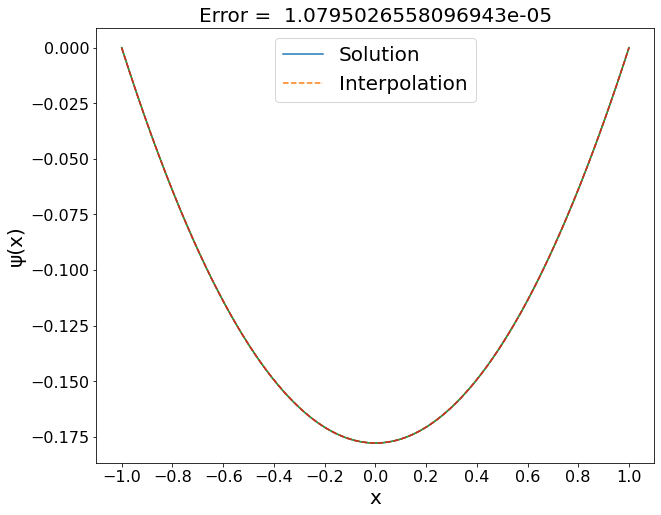

In [ ]:
#Problem 4
a4, b4 =-1, 1
l4 = 45/8
f4 = lambda x: ((x+2)*(2*x -1))/2
k4 = lambda x, y: x* (y**2)
FIE2_Nystrom(k4, f4, l4, a4, b4)